In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Checking if we are using google colab or local machine and configuring 
# imports accordingly
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP
from cnp.run_experiment import run_experiment

import torch
import numpy as np
from copy import copy

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:
if google_colab=='yes':
    config_dir = 'base_configs'
else:
    config_dir = os.path.join(BASE_DIR,'base_configs')

# checkin the parameters
# loading the base config file for this experiment
with open(os.path.join(config_dir,'gp_paper_configs.json')) as f:
    file = f.read()
    base_config = json.loads(file)
base_config

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0.2,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.GaussianProcess',
  'init_kwargs': {'steps': 400, 'range_x': [-2, 2], 'xdim': 1},
  'num_instances_train': 64,
  'num_instances_vali': 10,
  'num_instances_test': 100,
  'noise': 0.0004,
  'length_scale': 0.4,
  'gamma': 1},
 'experiment_params': {'lr': 0.0001,
  'n_epochs': 200000,
  'seed': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 10,
  'batch_size_test': 10,
  'plot_progress': True,
  'plot_mode': '1d_regression',
  'print_after': 1000}}

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    base_config['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    base_config['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
base_config['cnp_params']['dimx'] = 1
base_config['data_kwargs']['init_kwargs']['xdim'] = 1
base_config['train_kwargs']['plot_mode'] = '1d_regression'

In [6]:
base_config['train_kwargs']['print_after'] = 1000

## Simple Mean Experiment 

In [7]:
mean_exp_config = copy(base_config)

  0%|          | 0/200000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
Mean training loss at epoch 0 :                         1.499
Mean Validation loss after 0 equals                     1.59



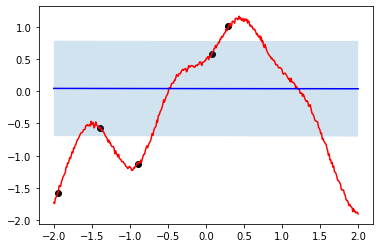

  0%|          | 6/200000 [00:00<11:43:27,  4.74it/s]

Validation loss for the function plotted:                                     1.59


  0%|          | 998/200000 [00:18<55:02, 60.25it/s]  

Mean training loss at epoch 1000 :                         1.144
Mean Validation loss after 1000 equals                     1.328



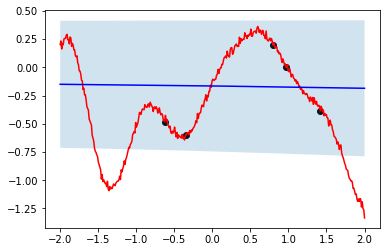

Validation loss for the function plotted:                                     1.328


  1%|          | 1999/200000 [00:34<1:30:57, 36.28it/s]

Mean training loss at epoch 2000 :                         1.315
Mean Validation loss after 2000 equals                     1.067



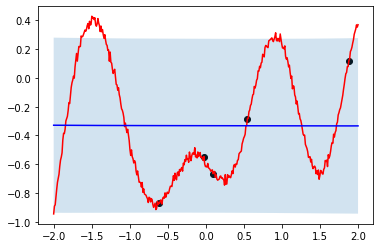

  1%|          | 2010/200000 [00:35<1:43:15, 31.96it/s]

Validation loss for the function plotted:                                     1.067


  1%|▏         | 2998/200000 [00:51<51:55, 63.23it/s]  

Mean training loss at epoch 3000 :                         1.133
Mean Validation loss after 3000 equals                     1.467



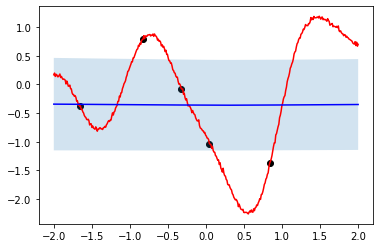

Validation loss for the function plotted:                                     1.467


  2%|▏         | 3998/200000 [01:09<52:45, 61.92it/s]  

Mean training loss at epoch 4000 :                         1.168
Mean Validation loss after 4000 equals                     1.243



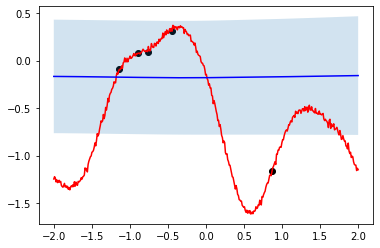

Validation loss for the function plotted:                                     1.243


  2%|▏         | 4999/200000 [01:25<53:21, 60.90it/s]  

Mean training loss at epoch 5000 :                         1.196
Mean Validation loss after 5000 equals                     1.241



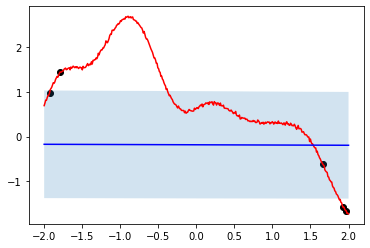

Validation loss for the function plotted:                                     1.241


  3%|▎         | 5996/200000 [01:42<56:38, 57.08it/s]  

Mean training loss at epoch 6000 :                         1.406
Mean Validation loss after 6000 equals                     1.633



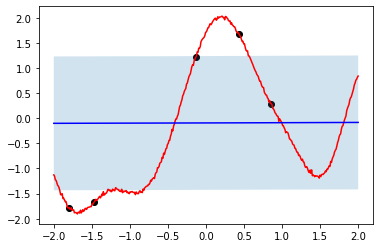

Validation loss for the function plotted:                                     1.633


  3%|▎         | 6994/200000 [02:01<52:30, 61.26it/s]  

Mean training loss at epoch 7000 :                         1.105
Mean Validation loss after 7000 equals                     1.593



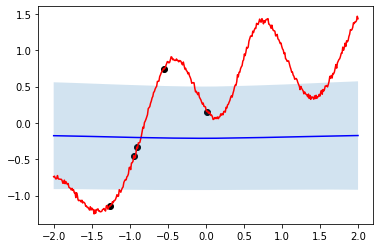

  4%|▎         | 7001/200000 [02:01<1:15:35, 42.55it/s]

Validation loss for the function plotted:                                     1.593


  4%|▍         | 7997/200000 [02:18<50:45, 63.04it/s]  

Mean training loss at epoch 8000 :                         1.17
Mean Validation loss after 8000 equals                     1.433



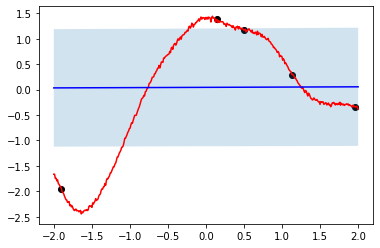

Validation loss for the function plotted:                                     1.433


  4%|▍         | 8998/200000 [02:34<52:09, 61.04it/s]  

Mean training loss at epoch 9000 :                         1.165
Mean Validation loss after 9000 equals                     1.368



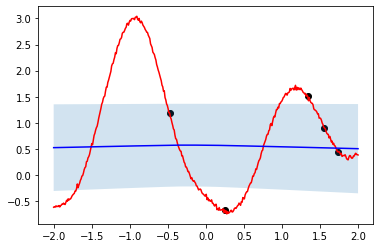

Validation loss for the function plotted:                                     1.368


  5%|▍         | 9996/200000 [02:52<53:54, 58.74it/s]  

Mean training loss at epoch 10000 :                         1.28
Mean Validation loss after 10000 equals                     1.318



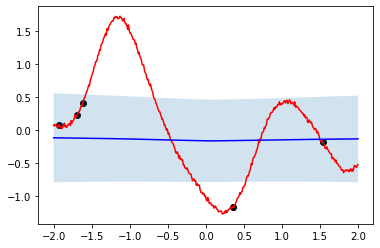

Validation loss for the function plotted:                                     1.318


  5%|▌         | 10997/200000 [03:10<58:37, 53.74it/s]  

Mean training loss at epoch 11000 :                         1.184
Mean Validation loss after 11000 equals                     1.488



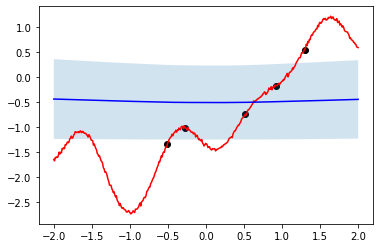

Validation loss for the function plotted:                                     1.488


  6%|▌         | 11998/200000 [03:28<57:38, 54.36it/s]  

Mean training loss at epoch 12000 :                         1.112
Mean Validation loss after 12000 equals                     1.34



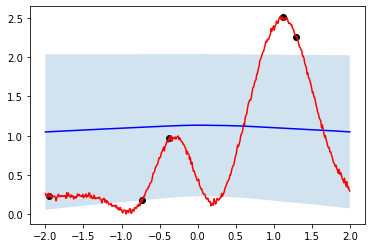

  6%|▌         | 12004/200000 [03:28<1:47:52, 29.04it/s]

Validation loss for the function plotted:                                     1.34


  6%|▋         | 12999/200000 [03:45<51:25, 60.60it/s]  

Mean training loss at epoch 13000 :                         1.136
Mean Validation loss after 13000 equals                     1.212



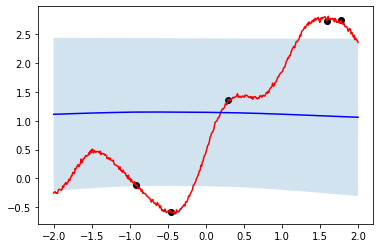

Validation loss for the function plotted:                                     1.212


  7%|▋         | 13996/200000 [04:02<59:14, 52.33it/s]  

Mean training loss at epoch 14000 :                         1.235
Mean Validation loss after 14000 equals                     1.863



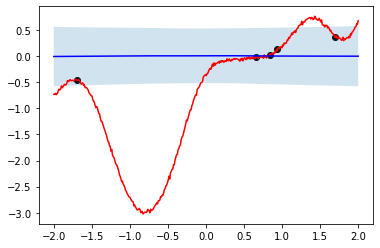

  7%|▋         | 14002/200000 [04:03<1:55:29, 26.84it/s]

Validation loss for the function plotted:                                     1.863


  7%|▋         | 14997/200000 [04:21<56:08, 54.92it/s]  

Mean training loss at epoch 15000 :                         1.222
Mean Validation loss after 15000 equals                     1.639



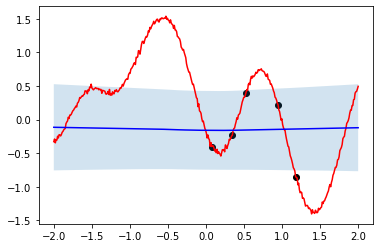

Validation loss for the function plotted:                                     1.639


  8%|▊         | 15995/200000 [04:38<49:23, 62.08it/s]  

Mean training loss at epoch 16000 :                         1.264
Mean Validation loss after 16000 equals                     1.298



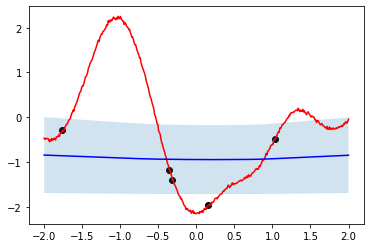

  8%|▊         | 16002/200000 [04:38<1:11:23, 42.95it/s]

Validation loss for the function plotted:                                     1.298


  8%|▊         | 17000/200000 [04:56<57:00, 53.49it/s]  

Mean training loss at epoch 17000 :                         1.118
Mean Validation loss after 17000 equals                     1.481



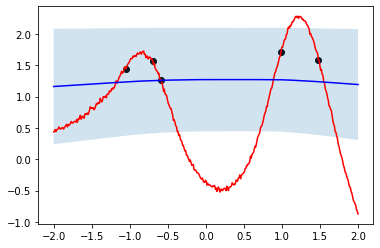

Validation loss for the function plotted:                                     1.481


  9%|▉         | 17996/200000 [05:13<48:53, 62.05it/s]  

Mean training loss at epoch 18000 :                         1.132
Mean Validation loss after 18000 equals                     1.216



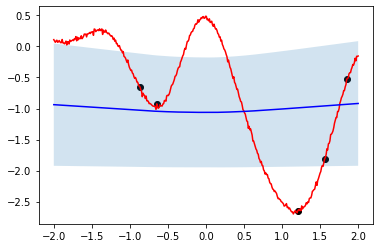

  9%|▉         | 18003/200000 [05:13<1:10:19, 43.13it/s]

Validation loss for the function plotted:                                     1.216


  9%|▉         | 18994/200000 [12:00:28<51:31, 58.54it/s]        

Mean training loss at epoch 19000 :                         1.205
Mean Validation loss after 19000 equals                     1.228



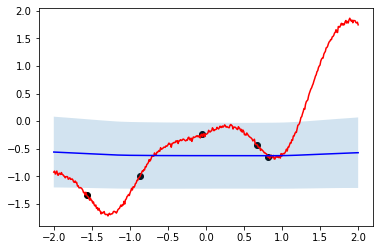

 10%|▉         | 19007/200000 [12:00:29<1:16:59, 39.18it/s]

Validation loss for the function plotted:                                     1.228


 10%|▉         | 19999/200000 [12:00:55<47:10, 63.60it/s]   

Mean training loss at epoch 20000 :                         1.199
Mean Validation loss after 20000 equals                     1.512



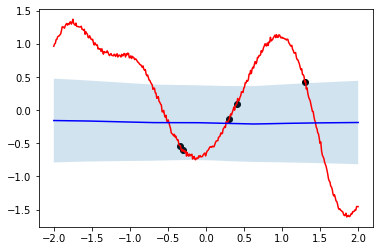

Validation loss for the function plotted:                                     1.512


 10%|█         | 20997/200000 [12:01:10<46:53, 63.63it/s]  

Mean training loss at epoch 21000 :                         1.17
Mean Validation loss after 21000 equals                     1.188



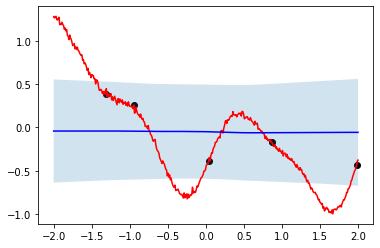

Validation loss for the function plotted:                                     1.188


 11%|█         | 21998/200000 [12:01:25<45:29, 65.22it/s]  

Mean training loss at epoch 22000 :                         1.209
Mean Validation loss after 22000 equals                     1.289



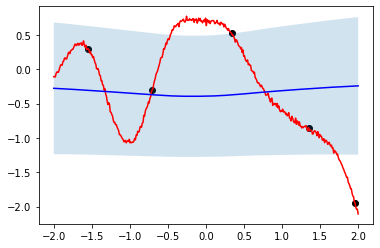

Validation loss for the function plotted:                                     1.289


 11%|█▏        | 22999/200000 [12:03:33<43:39, 67.58it/s]    

Mean training loss at epoch 23000 :                         1.177
Mean Validation loss after 23000 equals                     1.433



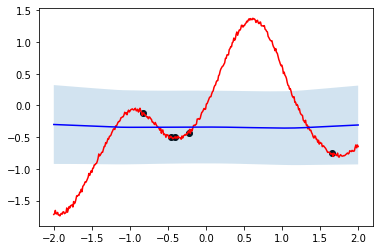

Validation loss for the function plotted:                                     1.433


 12%|█▏        | 23998/200000 [12:03:50<46:51, 62.60it/s]  

Mean training loss at epoch 24000 :                         1.005
Mean Validation loss after 24000 equals                     1.319



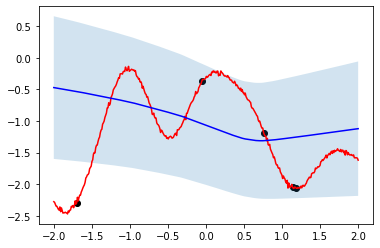

Validation loss for the function plotted:                                     1.319


 12%|█▏        | 24995/200000 [12:04:06<47:24, 61.53it/s]  

Mean training loss at epoch 25000 :                         1.116
Mean Validation loss after 25000 equals                     1.241



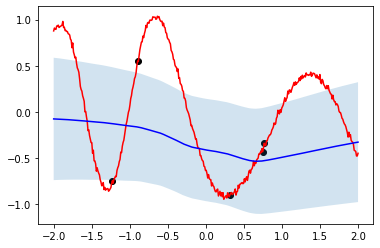

 13%|█▎        | 25008/200000 [12:04:06<1:24:01, 34.71it/s]

Validation loss for the function plotted:                                     1.241


 13%|█▎        | 25998/200000 [12:04:22<44:31, 65.13it/s]  

Mean training loss at epoch 26000 :                         0.908
Mean Validation loss after 26000 equals                     1.005



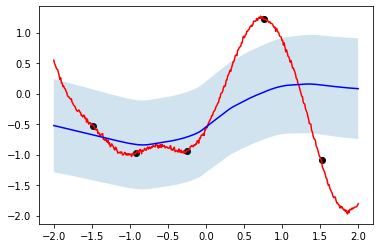

Validation loss for the function plotted:                                     1.005


 13%|█▎        | 26998/200000 [12:04:38<45:45, 63.00it/s]  

Mean training loss at epoch 27000 :                         1.088
Mean Validation loss after 27000 equals                     1.331



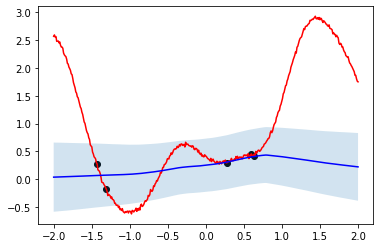

Validation loss for the function plotted:                                     1.331


 14%|█▍        | 27996/200000 [12:04:54<47:02, 60.93it/s]  

Mean training loss at epoch 28000 :                         1.372
Mean Validation loss after 28000 equals                     1.125



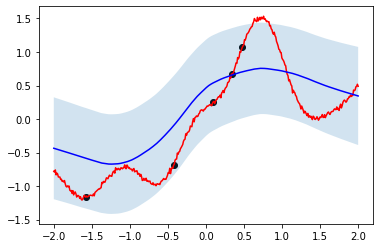

Validation loss for the function plotted:                                     1.125


 14%|█▍        | 28997/200000 [12:05:11<43:27, 65.58it/s]  

Mean training loss at epoch 29000 :                         1.021
Mean Validation loss after 29000 equals                     1.451



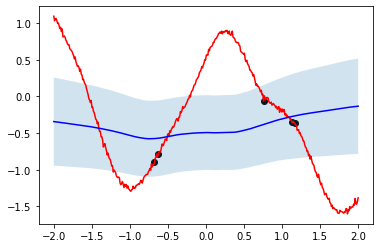

Validation loss for the function plotted:                                     1.451


 15%|█▍        | 29998/200000 [12:05:27<45:50, 61.80it/s]  

Mean training loss at epoch 30000 :                         1.153
Mean Validation loss after 30000 equals                     1.028



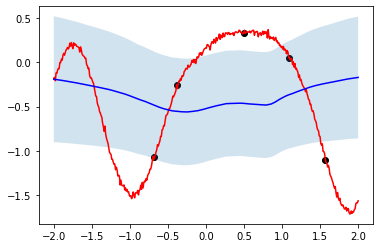

Validation loss for the function plotted:                                     1.028


 15%|█▌        | 30996/200000 [12:05:42<42:54, 65.65it/s]  

Mean training loss at epoch 31000 :                         0.952
Mean Validation loss after 31000 equals                     1.007



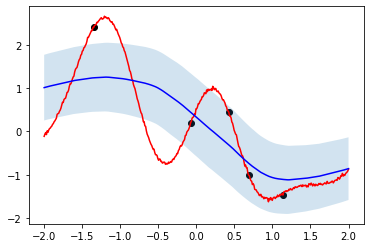

Validation loss for the function plotted:                                     1.007


 16%|█▌        | 31994/200000 [12:05:59<43:25, 64.47it/s]  

Mean training loss at epoch 32000 :                         0.916
Mean Validation loss after 32000 equals                     0.919



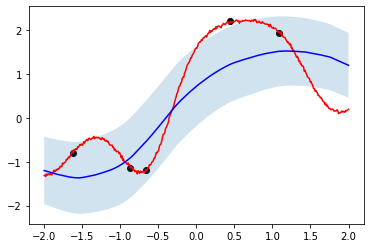

 16%|█▌        | 32001/200000 [12:05:59<1:02:37, 44.71it/s]

Validation loss for the function plotted:                                     0.919


 16%|█▋        | 32999/200000 [12:06:15<44:15, 62.88it/s]  

Mean training loss at epoch 33000 :                         1.043
Mean Validation loss after 33000 equals                     1.507



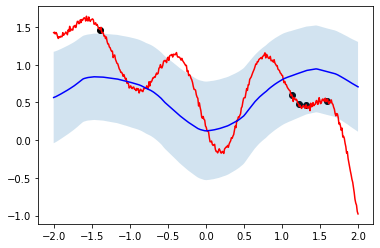

Validation loss for the function plotted:                                     1.507


 17%|█▋        | 33994/200000 [12:06:31<43:04, 64.23it/s]  

Mean training loss at epoch 34000 :                         0.936
Mean Validation loss after 34000 equals                     1.403



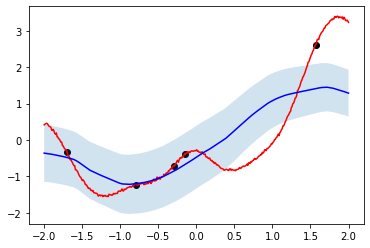

 17%|█▋        | 34001/200000 [12:06:31<1:01:54, 44.69it/s]

Validation loss for the function plotted:                                     1.403


 17%|█▋        | 34998/200000 [12:06:46<42:36, 64.54it/s]  

Mean training loss at epoch 35000 :                         1.334
Mean Validation loss after 35000 equals                     0.964



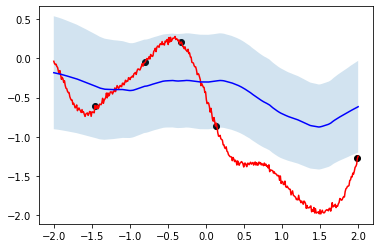

 18%|█▊        | 35005/200000 [12:06:47<1:24:36, 32.50it/s]

Validation loss for the function plotted:                                     0.964


 18%|█▊        | 35994/200000 [12:07:02<42:16, 64.66it/s]  

Mean training loss at epoch 36000 :                         0.849
Mean Validation loss after 36000 equals                     1.015



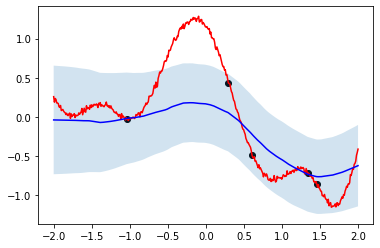

 18%|█▊        | 36001/200000 [12:07:03<1:01:25, 44.50it/s]

Validation loss for the function plotted:                                     1.015


 18%|█▊        | 37000/200000 [12:07:19<44:09, 61.52it/s]  

Mean training loss at epoch 37000 :                         1.054
Mean Validation loss after 37000 equals                     1.335



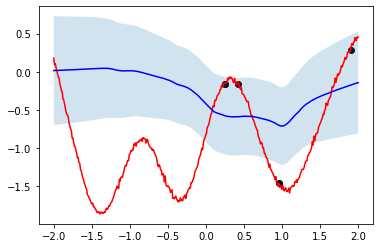

Validation loss for the function plotted:                                     1.335


 19%|█▉        | 37997/200000 [12:07:35<40:29, 66.68it/s]  

Mean training loss at epoch 38000 :                         0.754
Mean Validation loss after 38000 equals                     1.133



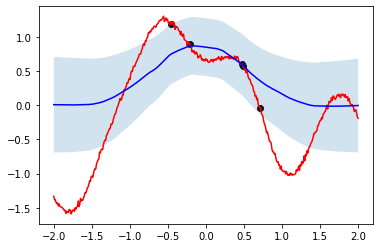

 19%|█▉        | 38004/200000 [12:07:36<1:10:54, 38.08it/s]

Validation loss for the function plotted:                                     1.133


 20%|█▉        | 39000/200000 [12:07:57<53:39, 50.01it/s]  

Mean training loss at epoch 39000 :                         0.886
Mean Validation loss after 39000 equals                     1.098



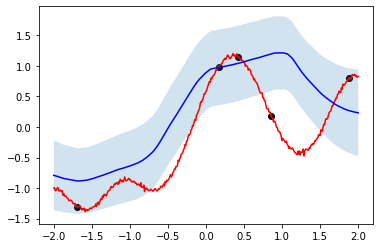

 20%|█▉        | 39006/200000 [12:07:58<1:25:25, 31.41it/s]

Validation loss for the function plotted:                                     1.098


 20%|██        | 40000/200000 [12:08:18<53:59, 49.39it/s]  

Mean training loss at epoch 40000 :                         0.943
Mean Validation loss after 40000 equals                     0.905



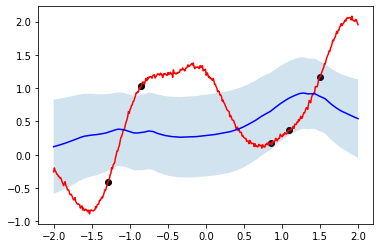

Validation loss for the function plotted:                                     0.905


 20%|██        | 40999/200000 [12:08:39<54:22, 48.74it/s]  

Mean training loss at epoch 41000 :                         0.855
Mean Validation loss after 41000 equals                     1.276



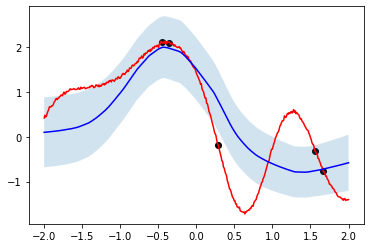

Validation loss for the function plotted:                                     1.276


 21%|██        | 41998/200000 [12:09:11<58:22, 45.11it/s]   

Mean training loss at epoch 42000 :                         0.736
Mean Validation loss after 42000 equals                     0.837



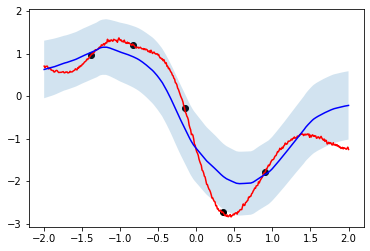

Validation loss for the function plotted:                                     0.837


 22%|██▏       | 43000/200000 [12:09:34<59:45, 43.78it/s]  

Mean training loss at epoch 43000 :                         0.809
Mean Validation loss after 43000 equals                     1.189



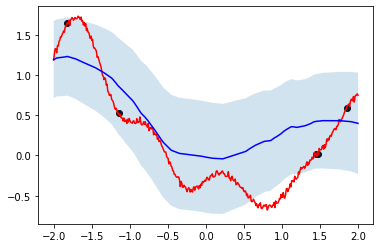

 22%|██▏       | 43005/200000 [12:09:35<2:39:19, 16.42it/s]

Validation loss for the function plotted:                                     1.189


 22%|██▏       | 44000/200000 [12:10:03<1:12:06, 36.06it/s]

Mean training loss at epoch 44000 :                         0.855
Mean Validation loss after 44000 equals                     1.206



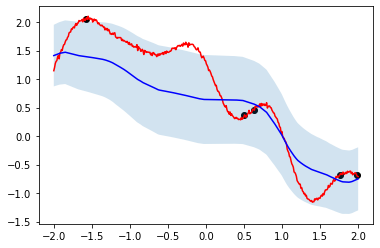

 22%|██▏       | 44004/200000 [12:10:03<1:57:42, 22.09it/s]

Validation loss for the function plotted:                                     1.206


 22%|██▏       | 44999/200000 [12:10:40<1:06:43, 38.71it/s]

Mean training loss at epoch 45000 :                         0.846
Mean Validation loss after 45000 equals                     1.255



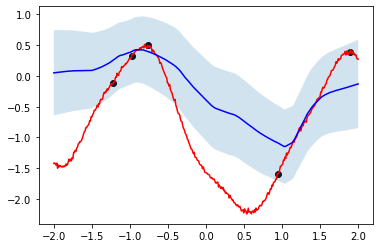

 23%|██▎       | 45009/200000 [12:10:41<1:26:51, 29.74it/s]

Validation loss for the function plotted:                                     1.255


 23%|██▎       | 46000/200000 [12:11:12<2:51:05, 15.00it/s]

Mean training loss at epoch 46000 :                         0.676
Mean Validation loss after 46000 equals                     1.33



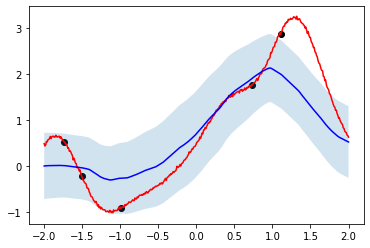

 23%|██▎       | 46008/200000 [12:11:13<2:32:31, 16.83it/s]

Validation loss for the function plotted:                                     1.33


 23%|██▎       | 46996/200000 [12:11:37<51:03, 49.94it/s]  

Mean training loss at epoch 47000 :                         0.421
Mean Validation loss after 47000 equals                     0.983



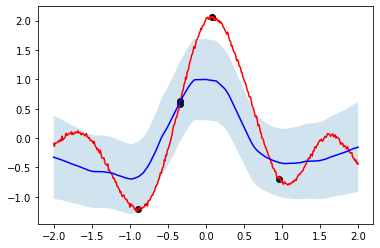

Validation loss for the function plotted:                                     0.983


 24%|██▍       | 47998/200000 [12:12:03<57:31, 44.04it/s]  

Mean training loss at epoch 48000 :                         1.232
Mean Validation loss after 48000 equals                     0.949



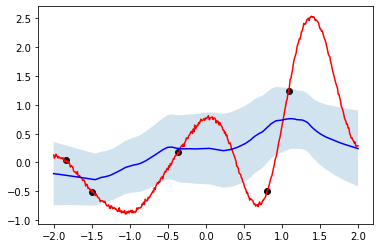

Validation loss for the function plotted:                                     0.949


 24%|██▍       | 48997/200000 [12:12:24<46:29, 54.13it/s]  

Mean training loss at epoch 49000 :                         1.24
Mean Validation loss after 49000 equals                     0.937



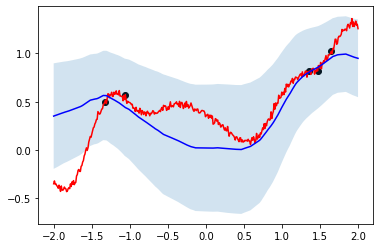

 25%|██▍       | 49003/200000 [12:12:24<1:06:22, 37.91it/s]

Validation loss for the function plotted:                                     0.937


 25%|██▍       | 49996/200000 [12:12:42<40:52, 61.15it/s]  

Mean training loss at epoch 50000 :                         0.714
Mean Validation loss after 50000 equals                     0.948



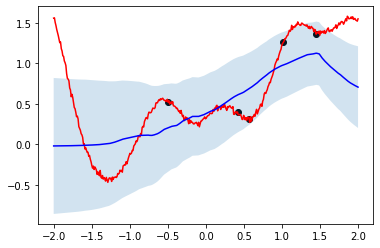

 25%|██▌       | 50003/200000 [12:12:42<58:50, 42.49it/s]

Validation loss for the function plotted:                                     0.948


 25%|██▌       | 50999/200000 [12:12:59<43:45, 56.76it/s]

Mean training loss at epoch 51000 :                         0.668
Mean Validation loss after 51000 equals                     0.897



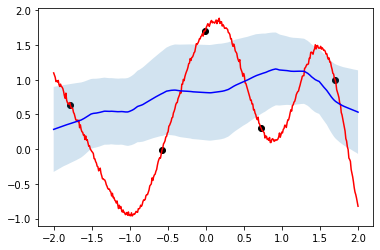

 26%|██▌       | 51005/200000 [12:12:59<1:17:24, 32.08it/s]

Validation loss for the function plotted:                                     0.897


 26%|██▌       | 51994/200000 [12:13:17<44:05, 55.96it/s]  

Mean training loss at epoch 52000 :                         0.979
Mean Validation loss after 52000 equals                     1.405



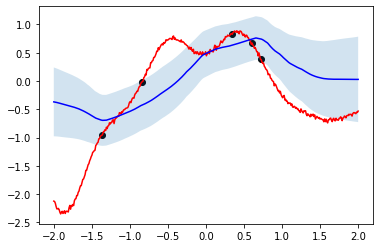

 26%|██▌       | 52001/200000 [12:13:17<1:00:29, 40.77it/s]

Validation loss for the function plotted:                                     1.405


 26%|██▋       | 53000/200000 [12:13:37<42:35, 57.53it/s]  

Mean training loss at epoch 53000 :                         0.574
Mean Validation loss after 53000 equals                     1.11



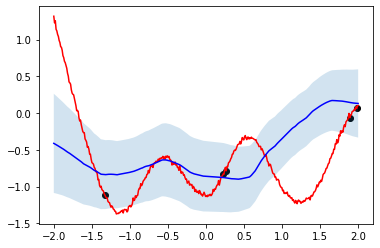

Validation loss for the function plotted:                                     1.11


 27%|██▋       | 54000/200000 [12:13:57<48:14, 50.43it/s]  

Mean training loss at epoch 54000 :                         0.671
Mean Validation loss after 54000 equals                     1.003



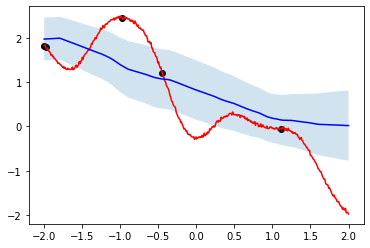

Validation loss for the function plotted:                                     1.003


 27%|██▋       | 54998/200000 [12:14:16<44:02, 54.87it/s]  

Mean training loss at epoch 55000 :                         0.746
Mean Validation loss after 55000 equals                     0.898



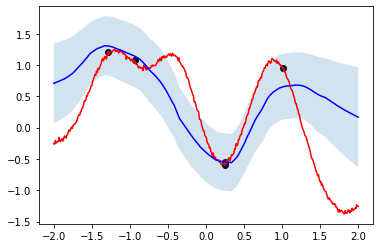

Validation loss for the function plotted:                                     0.898


 28%|██▊       | 55997/200000 [12:14:35<56:09, 42.73it/s]  

Mean training loss at epoch 56000 :                         0.86
Mean Validation loss after 56000 equals                     1.172



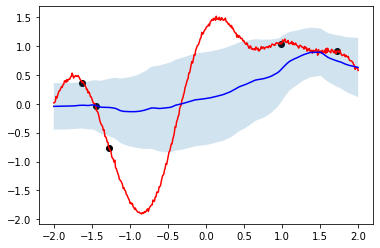

 28%|██▊       | 56007/200000 [12:14:35<1:13:30, 32.65it/s]

Validation loss for the function plotted:                                     1.172


 28%|██▊       | 56908/200000 [12:14:52<41:08, 57.97it/s]  

In [ ]:
run_experiment(config_file=mean_exp_config,
               experiment_name='1d_gp_mean_5ctxt',
              google_colab=google_colab)

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
seed is set


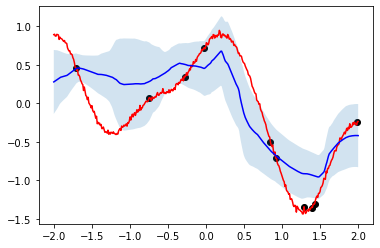

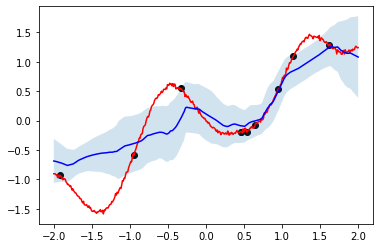

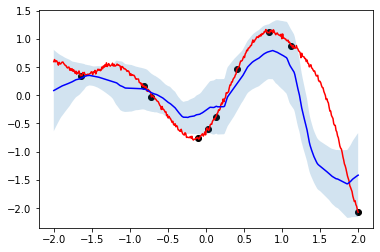

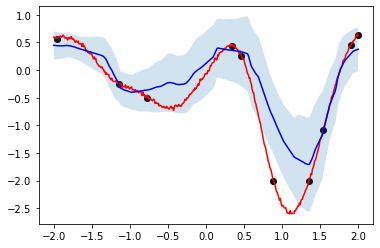

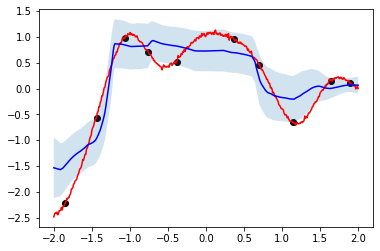

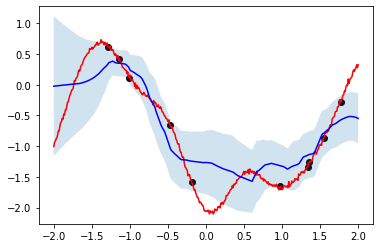

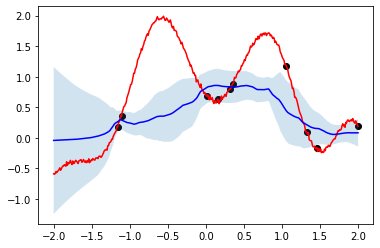

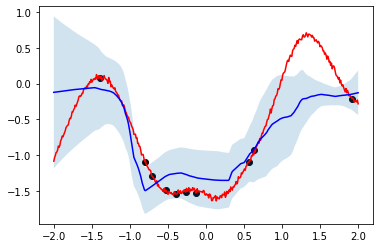

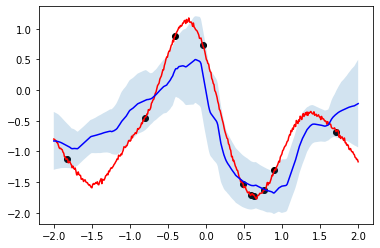

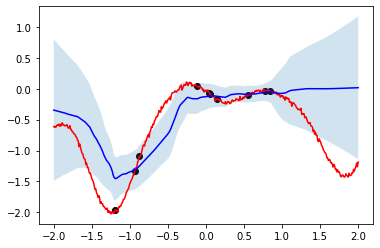

In [30]:
## Predicting with twice the number of context points
experiment_name = '1d_gp_mean_5ctxt_2020_06_30_12_14'
result_path = 'experiments/results'
with open(os.path.join(result_path, experiment_name,'config_file.json')) as file:
    experiment_config = json.load(file)

experiment_config['cnp_params']['max_contx']=20
CondNeuralProcess = RegressionCNP(**experiment_config['cnp_params'])

trainer = RegressionTrainer(
    data_kwargs=experiment_config['data_kwargs'],
    cnp=CondNeuralProcess,
     **experiment_config['experiment_params'])

if train_on_gpu:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'))
else:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'),map_location=torch.device('cpu'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'),map_location=torch.device('cpu'))

total_mse, task_mses = trainer.run_test(
    encoder_state_dict,
    decoder_state_dict,
    aggregator_state_dict=None,
    batch_size_test=experiment_config['train_kwargs']['batch_size_test'],
    plot_mode=experiment_config['train_kwargs']['plot_mode'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using mean operation
seed is set


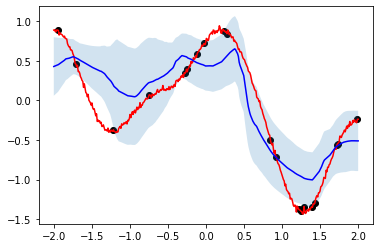

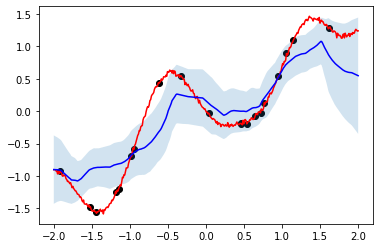

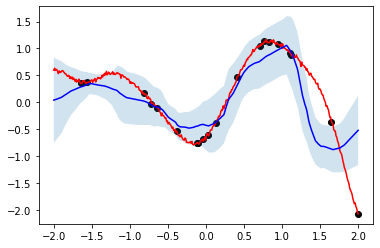

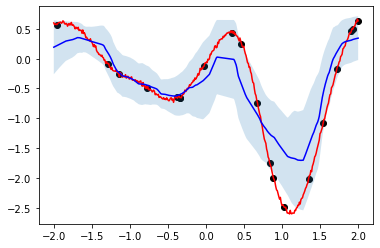

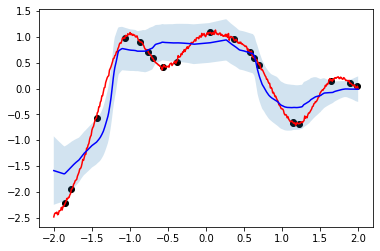

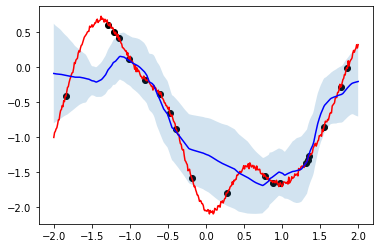

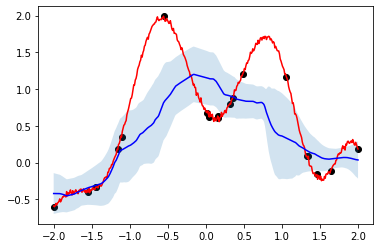

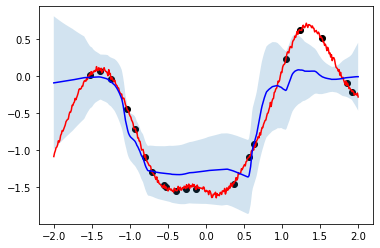

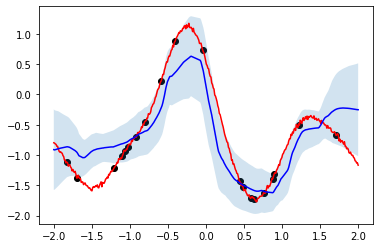

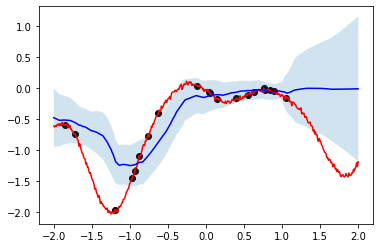

In [31]:
## Predicting with twice the number of context points
experiment_name = '1d_gp_mean_5ctxt_2020_06_30_12_14'
result_path = 'experiments/results'
with open(os.path.join(result_path, experiment_name,'config_file.json')) as file:
    experiment_config = json.load(file)

experiment_config['cnp_params']['max_contx']=40
CondNeuralProcess = RegressionCNP(**experiment_config['cnp_params'])

trainer = RegressionTrainer(
    data_kwargs=experiment_config['data_kwargs'],
    cnp=CondNeuralProcess,
     **experiment_config['experiment_params'])

if train_on_gpu:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'))
else:
    encoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'encoder'),map_location=torch.device('cpu'))
    decoder_state_dict = torch.load(os.path.join(result_path, experiment_name, 'decoder'),map_location=torch.device('cpu'))

total_mse, task_mses = trainer.run_test(
    encoder_state_dict,
    decoder_state_dict,
    aggregator_state_dict=None,
    batch_size_test=experiment_config['train_kwargs']['batch_size_test'],
    plot_mode=experiment_config['train_kwargs']['plot_mode'])

## Max Experiment 

In [ ]:
max_exp_config = copy(base_config)

In [ ]:
max_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='max'


 10%|█         | 1/10 [00:00<00:01,  6.44it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using max operation
Mean training loss at epoch 0 :                         1.455
Mean Validation loss after 0 equals                     1.535



100%|██████████| 10/10 [00:01<00:00,  6.98it/s]


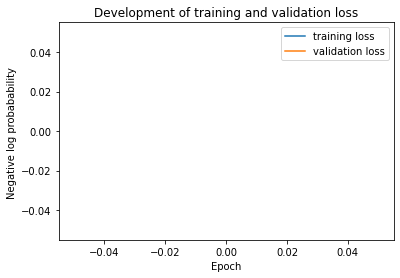

The mean squared error for this experiment is 1.0110417211055756
Creating new directory at experiments/results/10d_gp_max_2020_06_29_15_56
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=max_exp_config,
               experiment_name='1d_gp_max',
              google_colab=google_colab)

##  Sum Experiment 

In [ ]:
sum_exp_config = copy(base_config)

In [ ]:
sum_exp_config['cnp_params']['aggregation_kwargs']['simple_aggregator_type']='sum'

 10%|█         | 1/10 [00:00<00:01,  7.08it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Aggregation using sum operation
Mean training loss at epoch 0 :                         1.624
Mean Validation loss after 0 equals                     1.574



100%|██████████| 10/10 [00:01<00:00,  7.05it/s]


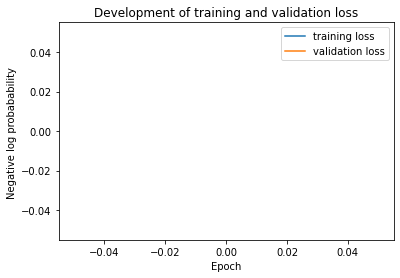

The mean squared error for this experiment is 1.0159607970714568
Creating new directory at experiments/results/10d_gp_sum_2020_06_29_15_56
Saving encoder
Saving decoder
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=sum_exp_config,
               experiment_name='1d_gp_sum',
              google_colab=google_colab)

##  Attention Model Experiment 

In [ ]:
aggregation_kwargs ={
      "aggregator": "BasicMLPAggregator",
      "insize": 128,
      "num_layers": 2,
      "num_neurons": 64,
      "dimout": 1
    }

In [ ]:
attention_exp_config = copy(base_config)
attention_exp_config['cnp_params']['aggregation_kwargs'] = aggregation_kwargs

  0%|          | 0/10 [00:00<?, ?it/s]

Training on GPU!
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=138, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
BasicMLPAggregator(
  (_process_input): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
  (softmax): Softmax(dim=1)
)


 10%|█         | 1/10 [00:00<00:01,  6.81it/s]

Mean training loss at epoch 0 :                         1.445
Mean Validation loss after 0 equals                     1.511



100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


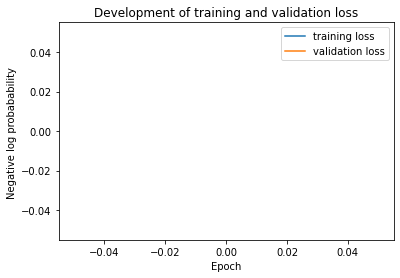

The mean squared error for this experiment is 1.0015557771921157
Creating new directory at experiments/results/10d_gp_attention_2020_06_29_15_56
Saving encoder
Saving decoder
Saving aggregator
Saving train_loss
Saving vali_loss
Saving task_mses
Saving config
Saving snapshot of the sytems


In [ ]:
run_experiment(config_file=attention_exp_config,
               experiment_name='1d_gp_attention',
              google_colab=google_colab)

##  Gated attention Model Experiment 

In [32]:
Helper.scale_shift_uniform(-2,2,*(400,5)).shape

torch.Size([400, 5])

In [28]:
torch.rand?

In [40]:
torch.norm?

In [45]:
torch.normal(0,1,(1,2)).double()

tensor([[-0.3963,  1.7399]], dtype=torch.float64)

In [48]:
import math

In [49]:
import matplotlib.pyplot as plt

In [50]:
import numpy as np

In [53]:
x  = np.linspace(-1,1, 100)

In [57]:
y = [math.tanh(val) for val in x]

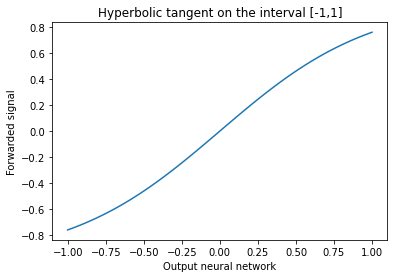

In [65]:
plt.plot(x,y)
plt.title('Hyperbolic tangent on the interval [-1,1]')
plt.xlabel('Output neural network')
plt.ylabel('Forwarded signal')

plt.show()
plt.close()